c:\users\jayad\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
c:\users\jayad\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7910 - loss: 0.7911 - val_accuracy: 0.9350 - val_loss: 0.2295
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9347 - loss: 0.2267 - val_accuracy: 0.9504 - val_loss: 0.1676
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9485 - loss: 0.1715 - val_accuracy: 0.9612 - val_loss: 0.1318
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9586 - loss: 0.1392 - val_accuracy: 0.9662 - val_loss: 0.1137
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9657 - loss: 0.1136 - val_accuracy: 0.9702 - val_loss: 0.1009
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9713 - loss: 0.0976 - val_accuracy: 0.9730 - val_loss: 0.0881
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9751 - loss: 0.0871 - val_accuracy: 0.9720 - val_loss: 0.0884
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9778 - loss: 0

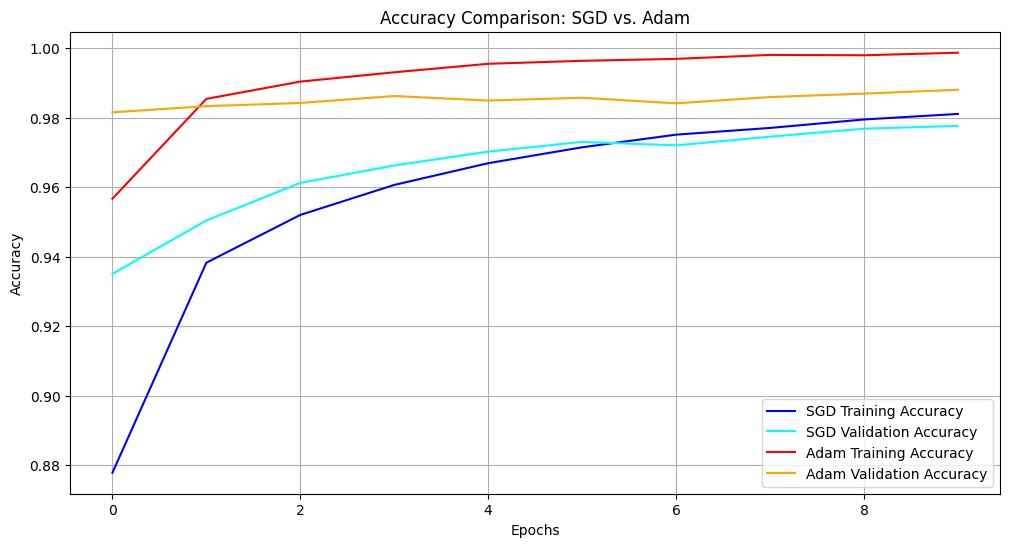

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 2. Preprocess the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# 3. Build the neural network model
def create_model():
    model = keras.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# 4. Compile and train the model using SGD
model_sgd = create_model()
model_sgd.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd = model_sgd.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

# 5. Compile and train the model using Adam
model_adam = create_model()
model_adam.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

# 6. Plot accuracy trends for comparison
plt.figure(figsize=(12, 6))
plt.plot(history_sgd.history['accuracy'], label='SGD Training Accuracy', color='blue')
plt.plot(history_sgd.history['val_accuracy'], label='SGD Validation Accuracy', color='cyan')
plt.plot(history_adam.history['accuracy'], label='Adam Training Accuracy', color='red')
plt.plot(history_adam.history['val_accuracy'], label='Adam Validation Accuracy', color='orange')

plt.title('Accuracy Comparison: SGD vs. Adam')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()